In [64]:
# import neccessary libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns, scipy.stats as st
print("---------------Libraries imported----------------")


---------------Libraries imported----------------


In [65]:
# Loading the dataset and performing  EDA
raw_data = pd.read_pickle("C:\\Users\\DELL\\Downloads\\ML_Projects\\Understanding-linear-Models\\AgesAndHeights.pkl")
print("---------------Dataset loaded succesfully----------------")
print("--head--")
print(raw_data.head())
print("\n--info--")
print(raw_data.describe())


---------------Dataset loaded succesfully----------------
--head--
         Age     Height
0  14.767874  59.627484
1   3.107671  36.146453
2   7.266917  46.912878
3   1.815180  29.125660
4  16.753758  68.170414

--info--
              Age      Height
count  100.000000  100.000000
mean     7.966138   45.955674
std      5.321621   10.787318
min     -0.780853   27.332513
25%      3.048885   36.320107
50%      7.795597   46.178251
75%     11.464331   53.994166
max     17.887852   68.170414


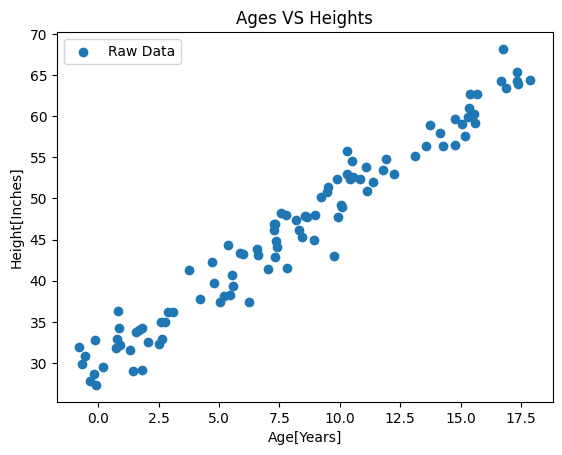

---------------Scatter plot generated and saved----------------


In [73]:
# Check the relationship of the variables(Linearity)
plt.scatter("Age", "Height", data = raw_data, label = 'Raw Data')
plt.title("Ages VS Heights")
plt.xlabel('Age[Years]')
plt.ylabel('Height[Inches]')
plt.savefig("scatter_age_height.png")
plt.legend(); plt.show()
print("---------------Scatter plot generated and saved----------------")

In [74]:
# we only want realistic Ages
df = raw_data[raw_data['Age'] > 0]

# Define Model fetures and labels
X = df[['Age']]
y = df['Height']

# Spilt Data
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = .2, random_state = 42
    )

# Fit Model
model = LinearRegression().fit(X_train, y_train)
print("---------------Model trained succesfully----------------")
# defining the model parameters
# α (intercept) and β (slope)
intercept, slope = model.intercept_, model.coef_[0]
print(f"α (intercept) = {intercept:.2f} | β (slope) = {slope:.2f}")




---------------Model trained succesfully----------------
α (intercept) = 30.12 | β (slope) = 1.98


---------------Making predictions----------------
---------------Predictions made succesfully-----


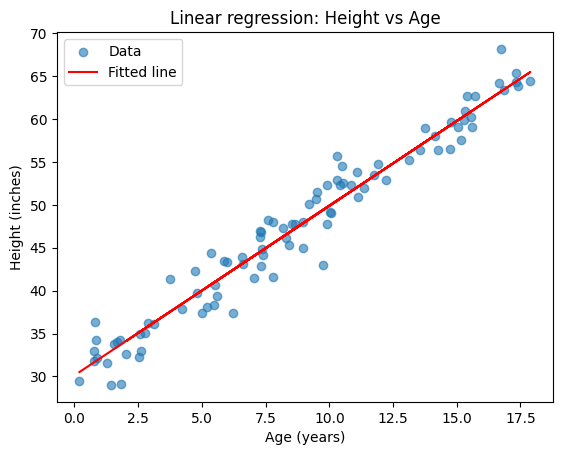

---------------Model performance----------------
R2 on train = 0.949314770391608
R2 on test = 0.9687403855959283


In [ ]:

# make predictions on the test set with the trained model
print("---------------Making predictions----------------")
y_pred = model.predict(X_test)
print("---------------Predictions made succesfully-----")
plt.scatter(df['Age'], df['Height'], alpha=0.6, label='Data')
plt.plot(X_test, y_pred, color='red', label='Fitted line')
plt.xlabel('Age (years)'); plt.ylabel('Height (inches)')
plt.title('Linear regression: Height vs Age')
plt.savefig("fit_linear_regression.png")
plt.legend(); plt.show()

# cheking model fit and generalization 
print("R2 on train =", r2_score(y_train, model.predict(X_train)))
print("R2 on test =", r2_score(y_test, model.predict(X_test)))



---------------Plotting Residuals vs Feature----------------
---------------Plotting Residual Distribution----------------
---------------Plotting Q-Q Plot of Residuals----------------


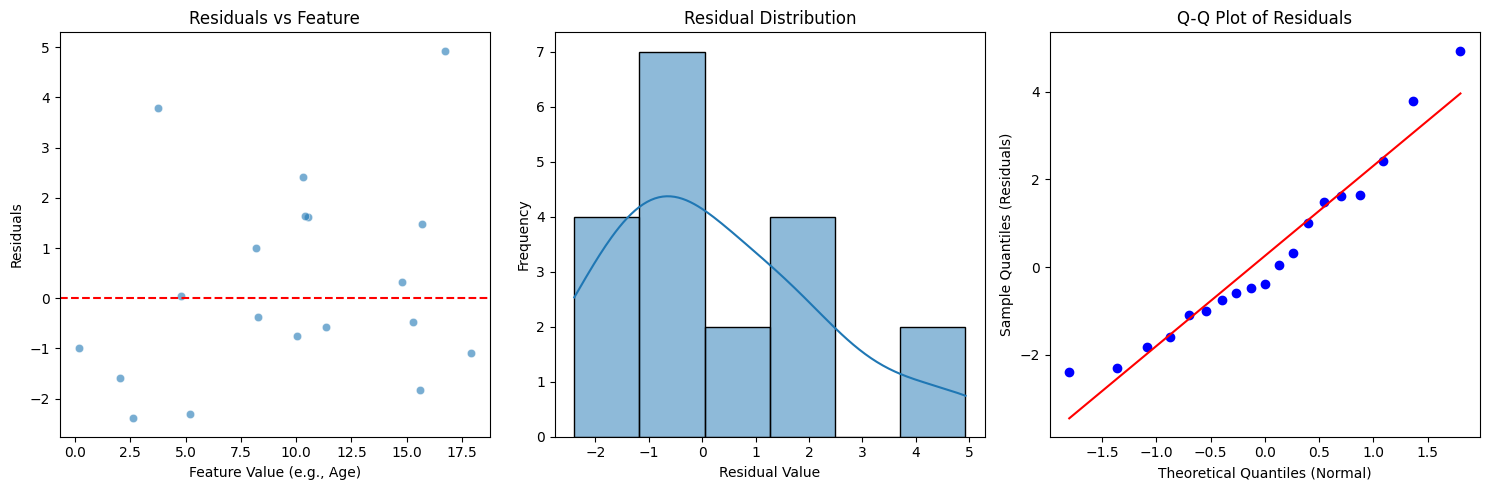

---------------Assumption Checks Complete----------------


In [ ]:
# some linear regression assumptions
y_pred_test = model.predict(X_test)
residuals = y_test - y_pred_test

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

print("---------------Plotting Residuals vs Feature----------------")
sns.scatterplot(x=X_test.iloc[:, 0] if hasattr(X_test, 'iloc') else X_test, y=residuals, ax=ax[0], alpha=0.6)
ax[0].axhline(0, color='red', linestyle='--')
ax[0].set_xlabel('Feature Value (e.g., Age)')
ax[0].set_ylabel('Residuals')
ax[0].set_title("Residuals vs Feature")


print("---------------Plotting Residual Distribution----------------")
sns.histplot(residuals, kde=True, ax=ax[1])
ax[1].set_xlabel('Residual Value')
ax[1].set_ylabel('Frequency')
ax[1].set_title("Residual Distribution")


print("---------------Plotting Q-Q Plot of Residuals----------------")
st.probplot(residuals, plot=ax[2])
ax[2].set_xlabel('Theoretical Quantiles (Normal)')
ax[2].set_ylabel('Sample Quantiles (Residuals)')
ax[2].set_title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.savefig("linear_regression_assumptions_plots.png")
plt.show()

print("---------------Assumption Checks Complete----------------")